<a href="https://colab.research.google.com/github/juliaplazari/EA-619/blob/main/Exp2/Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento 2 - EA619

## Alunos:
Júlia Perassolli De Lázari -
Turma K

RA: 200298

Vídeo: https://drive.google.com/file/d/18rKY-QgqBM7mccY3DBH_q-VUQaZWaGHd/view?usp=sharing

Thiago Soares Laitz -
Turma S

RA: 224898

Vídeo: https://drive.google.com/file/d/11yQHkcBHhRcntIvU29UQgUts_Ya71Nhi/view?usp=sharing

## Objetivo
 
 O objetivo desse experimento foi estudar mais sobre transmissão AM, explorando operações de modulação e demodulação e também de filtragem de sinais.

Para isso transmitimos dois sinais limitados em frequência em cerca de 4KHz, um em sua banda base, e outro modulado, e depois recuperamos ambos sinais.

## Importar bibliotecas e carregar áudio



In [ ]:
#@title Importar bibliotecas
#gerais
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams

#para o áudio
import IPython.display as ipd
from scipy.io import wavfile

#para ler arquivos a partir do drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#mostrar todas saídas
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Carregar sinais de áudio usando a biblioteca wavfile

In [ ]:
#lê arquivos de áudio a partir do drive
altas = drive.CreateFile({'id':'1ATfM3uN03zo7diwYAsU_CCwItGIyR9SE'})
altas.GetContentFile('altas.wav')

baixas = drive.CreateFile({'id':'1xPl5TCN-TcVJMgwQ0ylWTaXTvmxlvllt'})
baixas.GetContentFile('baixas.wav')

#ler 
fs, station2 = wavfile.read('altas.wav')
fs, station1 = wavfile.read('baixas.wav')

#Garantir que os dois sinais possuem o mesmo número de amostras
station2 = station2[:100000]
station1 = station1[:100000]

#Escutar áudios
print("Station1 - baixas frequências:")
ipd.Audio(station1[:100000],rate=fs)
print("Station2 - altas frequências:")
ipd.Audio(station2[:100000],rate=fs)

Station1 - baixas frequências:


Station2 - altas frequências:


In [ ]:
print(f"Frequência de amostragem: {fs} Hz")

Frequência de amostragem: 44100 Hz


## Frequência da portadora

**Suponha:**
- a maior frequência presente nos dois sinais seja 3 kHz. 
- o alto falante reproduza frequências até 12 kHz.

**Em que faixa deve estar a frequência da portadora para que não haja sobreposição entre os sinais no domínio da frequência, e para que o sinal modulado ainda possa ser transmitido?**

Como sabemos que a máxima frequência que o alto falante reproduz e que a maior frequência do sinal modulado será dada por $f_c + f_m$, sendo $f_c$ a frequência da portadora e $f_m$ a frequência da mensagem/sinal. 

No caso$f_m= 3KHz$ então:
$f_c + 3 < 12KHz => f_c < 9HKz$

Com isso, concluímos que a maior frequência da portadora para que o sinal modulado ainda possa ser transmitido é de 9KHz.




## Espectros

Criamos uma função para obter o espectro de um sinal e plotá-lo, apenas com as frequências positivas (função adaptada do experimento 1).



In [ ]:
def espectro(sinal,fs): #calcula w e Y para um sinal
    #transformada de Fourier do sinal
    Y = np.fft.fft(sinal)
    Y = Y[0:len(Y)//2]#apenas frequencias positivas
    #frequências
    Y = np.abs(Y)
    w = np.linspace(0,fs/2,Y.size)
    return w,Y  

def plot(x,y,title):
    #plota gráfico do espectro do sinal (magnitude em função da frequência)
    plt.figure(figsize=(10,6))
    plt.plot(x,y)
    plt.title(f"Espectro do sinal analisado: {title}",fontsize = 17)
    plt.xlabel("Frequência (Hz)",fontsize = 15)
    plt.ylabel("Amplitude",fontsize = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid()
    plt.show()

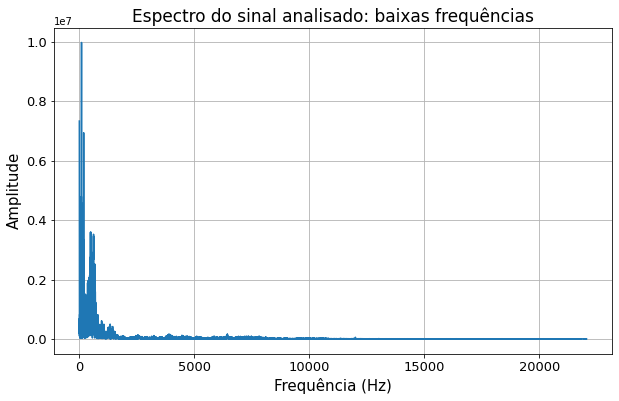

In [ ]:
w,Y = espectro(station1,fs)
plot(w,Y,"baixas frequências")

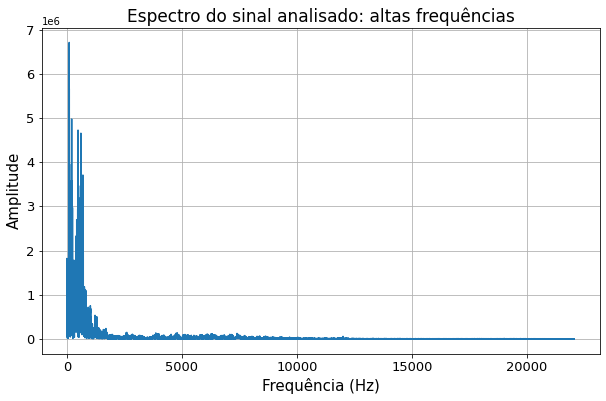

In [ ]:
w,Y = espectro(station2,fs)
plot(w,Y,"altas frequências")

Pelos gráficos podemos observar que nos dois sinais as princiais frequências se encontram abaixo de 3KHz, por isso, podemos filtrá-los com um filtro passa baixas de 3KHz sem prejuízo.

## Filtro

Projetar um filtro passa baixa para filtrar os sinais e eliminar ruídos, que atrapalhariam no processo de modulação de transmissão.

(0.0, 4000.0)

Text(0.5, 0, 'Frequência (Hz)')

Text(0, 0.5, '$|H(f)|$')

Text(0.5, 1.0, 'Filtro passa baixas de Butterworth')

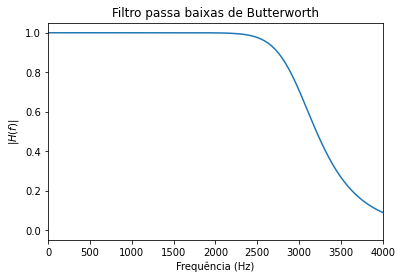

In [ ]:
#Projeta o filtro
sos = signal.butter(8, 3000, 'low', fs = fs, output = 'sos')

#Plota a resposta em frequência do filtro
w,h = signal.sosfreqz(sos,fs = fs)

plt.plot(w,np.abs(h))
plt.xlim(0,4000)
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa baixas de Butterworth')
plt.show()

#Filtra os sinais usando o filtro projetado acima
station2_f = signal.sosfilt(sos,station2)
station1_f = signal.sosfilt(sos,station1)

Plotar o espectros filtrados pelo filtro de Butterworth projetado acima.

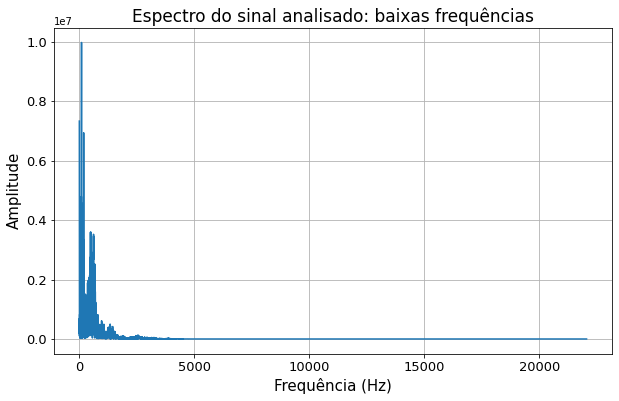

In [ ]:
w,Y = espectro(station1_f,fs)
plot(w,Y,"baixas frequências")

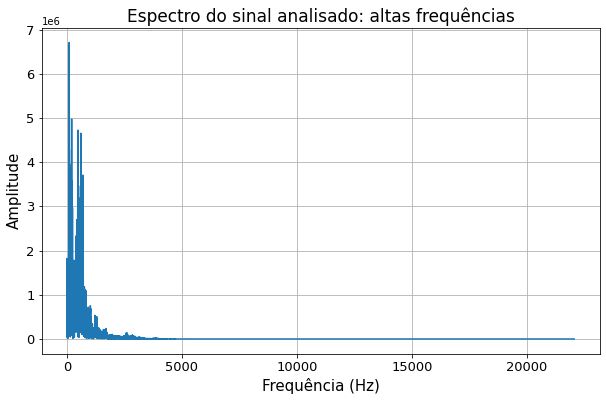

In [ ]:
w,Y = espectro(station2_f,fs)
plot(w,Y,"altas frequências")

A filtragem removeu aproximadamente todas as componentes acima de 3KHz (filtro não ideal), o que nos permite transmitir um dos sinais com uma portadora de frequência 8KHz sem que haja interferência.

## Modular

Para modular o sinal da estação 2, o multiplicamos por $cos(2\pi f_ct)$ com $f_c = 8KHz$.

In [ ]:
#numero amostras/fs = 100 000/44100
t = np.linspace(0,2.26,100000)#0-2.26s e 100000 amostras
fc = 8000
cos_amostrado = []

for k in range(len(t)):
  cos_amostrado.append(np.cos(2*np.pi*fc*t[k]))

station2_f_cos = []

for k in range(len(t)):
    station2_f_cos.append(station2_f[k] * cos_amostrado[k])

Espectro do sinal 2 modulado.

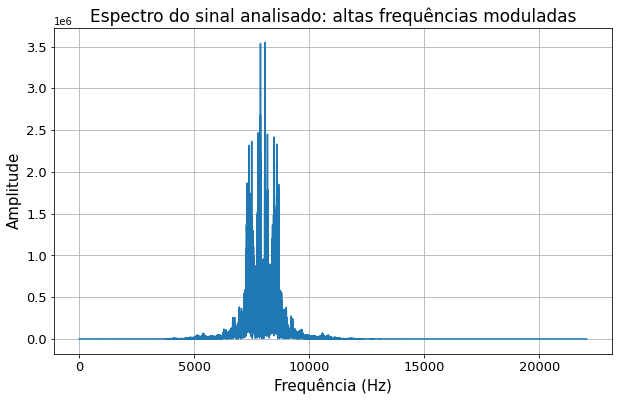

In [ ]:
w,Y = espectro(station2_f_cos,fs)
plot(w,Y,"altas frequências moduladas")

## Transmissão

Somar os dois sinais (station1 e station2 modulado) e transmiti-los.

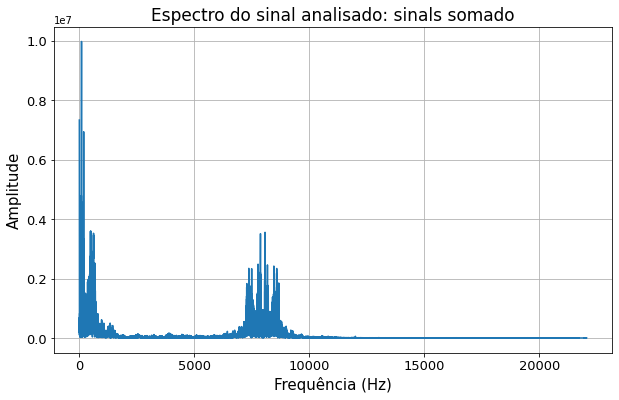

In [ ]:
station = station1 + station2_f_cos
w,Y = espectro(station,fs)
plot(w,Y,"sinais somado")

In [ ]:
ipd.Audio(station[:100000],rate=fs)

Comparando com o sinal rx dado no enunciado, podemos observar que os espectros e áudios são semelhantes.

In [ ]:
rx = drive.CreateFile({'id':'1hWxOqPoXv_qDWmpFHn7RO53qI5pPJZg1'})
rx.GetContentFile('rx.wav')
#rx = tx
fs, rx = wavfile.read('rx.wav')

ipd.Audio(rx[:100000],rate=fs)

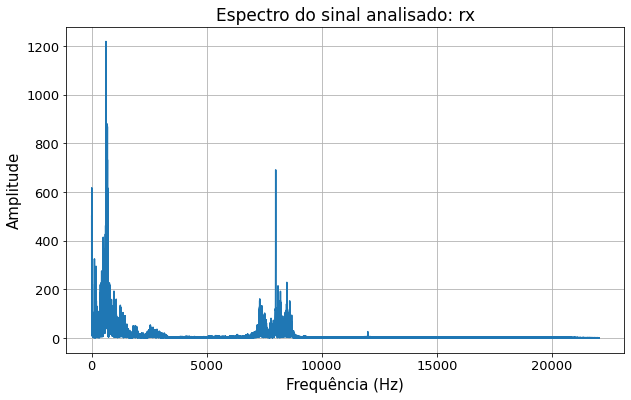

In [ ]:
w,Y = espectro(rx,fs)
plot(w,Y,"rx")

## Recuperar o sinal 1

Para recuperar o sinal 1 a partir do sinal station (sinais somados) utilizamos o mesmo filtro passa baixas com frequência de corte de 3KHz utilizado anteriormente.

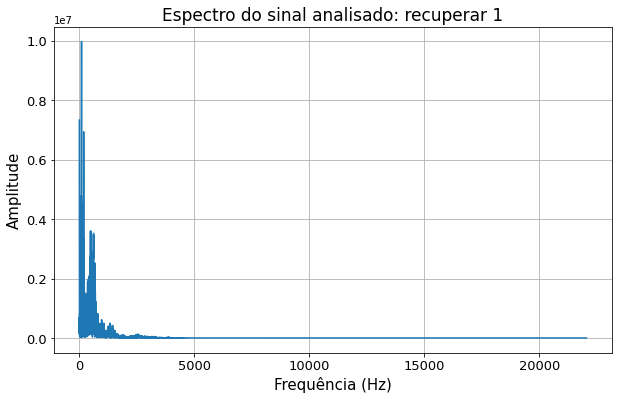

In [ ]:
recuperar_1 = signal.sosfilt(sos,station)
w,Y = espectro(recuperar_1,fs)
plot(w,Y,"recuperar 1")

In [ ]:
ipd.Audio(recuperar_1[:100000],rate=fs)

## Recuperar 2

Para recuperar o sinal 2, utilizamos um filtro passa faixa de 4KHz a 12KHz, assim, eliminamos o sinal do station1.

In [ ]:
#Projetar um filtro passa faixa
sos2 = signal.butter(8, (4000, 12000), btype = 'bandpass', fs = fs, output = 'sos')

#Filtra os sinais usando o filtro projetado acima
isolar_station2 = signal.sosfilt(sos2,station)

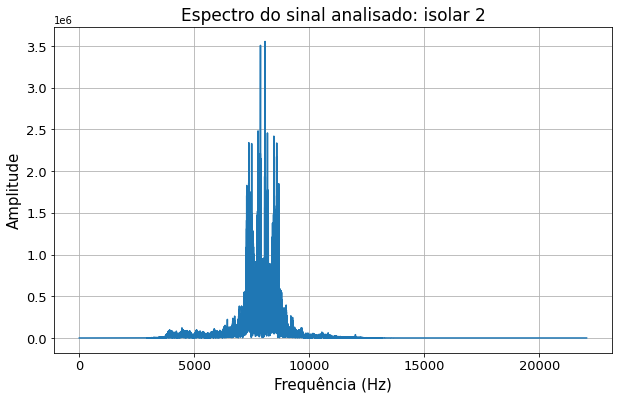

In [ ]:
w,Y = espectro(isolar_station2,fs)
plot(w,Y,"isolar 2")

Depois disso, o multiplicamos pelo mesmo cosseno utilizado na modulação.

In [ ]:
recuperar_2 = []
for k in range(len(t)):
  recuperar_2.append(isolar_station2[k] * cos_amostrado[k])

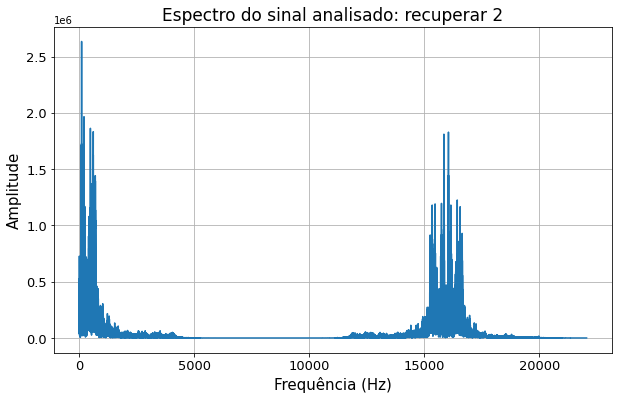

In [ ]:
w,Y = espectro(recuperar_2,fs)
plot(w,Y,"recuperar 2")

Por fim utilizamos o mesmo filtro passa baixas, para manter apenas a cópia de interesse (centrada na origem).

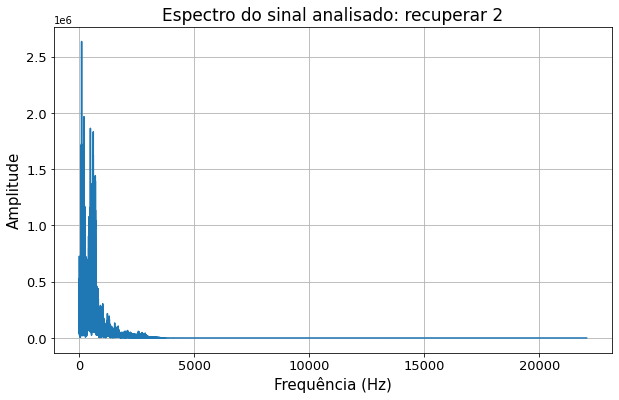

In [ ]:
recuperar_2 = signal.sosfilt(sos,recuperar_2)
w,Y = espectro(recuperar_2,fs)
plot(w,Y,"recuperar 2")

In [ ]:
ipd.Audio(recuperar_2[:100000],rate=fs)

Podemos obsservar que o sinal é bem semelhante ao original, apesar de apresentar pequenas distorções.